# Harga Rumah di Tangerang
Info: alamat dataset telah diubah ke strorage DQLab di Google APIs, pada tanggal 23 Nopember 2021, pastikan kembali kode yang telah ditulis telah sesuai dengan perubahan pada default live code untuk 19 baris pertama.
“Terima kasih, Aksara! Akhirnya kelar juga pekerjaan kemarin. Masih semangat, kan? Belum kapok kalau ada proyek baru datang lagi? Hahaha,” goda Senja.

“Asalkan ada bonus, maju terus,” candaku.

“Oke, kali ini serius. Kita diminta untuk mengembangkan model prediksi harga rumah di di Tangerang berdasarkan luas tanah, luas bangunan serta kedekatan lokasi dengan pusat kota. Untuk mengembangkan model prediksi ini, saya telah mengumpulkan beberapa data yang diperlukan. Coba kamu lihat,” jelas Senja.
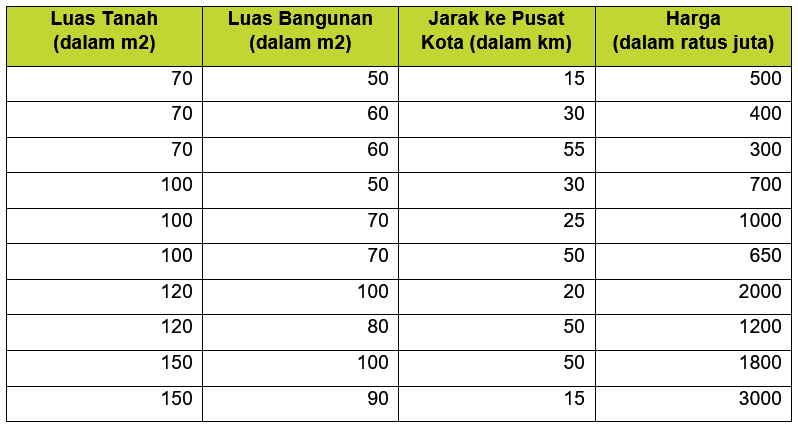

“Berarti aku akan memprediksi harga rumah ini berdasarkan kemiripan atribut dari data yang telah ada ini?” tanyaku memastikan. Senja mengangguk.


Aku pun segera menempatkan data tersebut ke dalam file harga_rumah.txt seperti berikut ini:
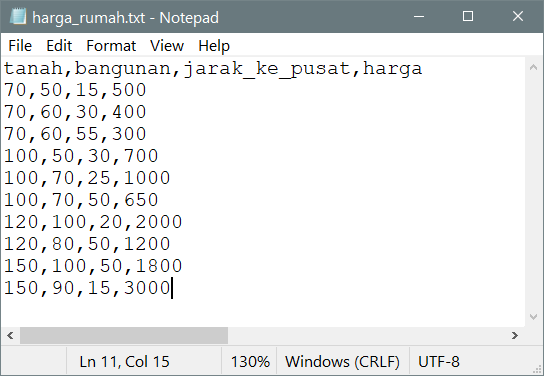


Tugas 1

Aku pun melanjutkan prosesnya dengan membaca file harga_rumah.txt dan merepresentasikan setiap data ke dalam tipe data dictionary dan menampung keseluruhan data dalam sebuah list bernama harga_rumah:
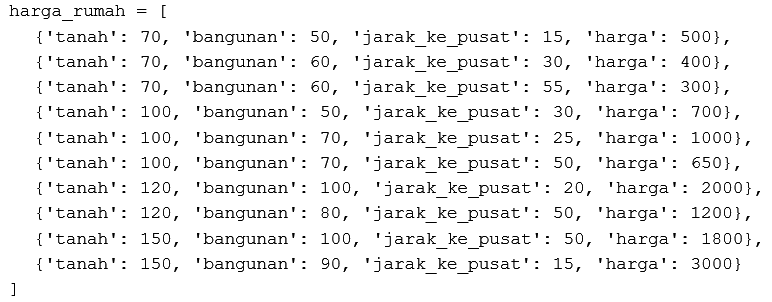

Setelah selesai memasukkan data dan menemukan jika nilai dari setiap atribut (tanah, bangunan, jarak_ke_pusat) tidak setara, aku mulai agak bingung. Tapi, harus tenang dan jangan panik!

Aku kembali mengecekanya dan memutuskan utnuk melakukan proses transformasi data. Transformasi data dilakukan dengan mengurangi setiap nilai atribut dalam data dengan nilai atribut minimum dan membaginya dengan nilai atribut maksimum yang dikurangi dengan nilai atribut minimum, seperti ini:

Untuk atribut tanah, nilai maksimum adalah 150 dan nilai minimum adalah 70.
Saat nilai atribut tanah 100, proses transformasi akan mengubah nilai atribut ini menjadi 0,375
nilai_transformasi = 100 - 70 / (150 - 70)
Aku mulai mendapat solusi untuk mempermudah proses transformasi data.

Tugas 2

Mula-mula,  aku akan membuat sebuah fungsi bernama get_all_specified_attribute yang menerima parameter list_of_dictionary (tipe data list yang berisikan sekumpulan tipe data dictionary) dan specified_key (tipe data string). Fungsi akan mengembalikan sebuah list yang berisikan seluruh atribut dengan kunci (key) specified_key.

Tugas 3

Kemudian, setelah berhasil membuat fungsi  tersebut, aku juga membuat fungsi min_value yang menerima parameter list_attributes (berupa tipe data list) dan mengembalikan nilai terkecil dalam list_attributes dan max_value yang menerima parameter list_attributes dan mengembalikan nilai terbesar dalam list_attributes.

Tugas 4

Selanjutnya aku membuat fungsi transform_attribute yang menerima parameter attr (sebuah bilangan), max_attr (sebuah bilangan) dan min_attr (sebuah bilangan) yang mengembalikan nilai transformasi dari sebuah attribute.

Tugas 5

“Sudah cukup, Nja?” tanyaku saat Senja terdiam lama menelusuri hasil kerjaku.

“Menurutku kita masih butuh fungsi baru yaitu fungsi data_transformation yang menerima parameter list_of_dictionary (sebuah list yang berisikan tipe data dictionary) dan list_attribute_names (sebuah list yang berisikan tipe data string) mengembalikan hasil transformasi data dari list_of_dictionary berdasarkan list_attribute_names telah dispesifikasikan.

Tugas 6

Dari data baru dan attr_info ini, Senja menyuruhku membuat fungsi transform_data yang menerima parameter data dan attr_info dan mengembalikan nilai atribut dari data baru yang telah ditransformasikan.

Tugas 7

Setelah itu, Senja memintaku untuk membuat sistem prediksi harga berdasarkan nilai kemiripan atribut.

Tugas 8

Dan aku menggunakan semua fungsi yang telah aku definisikan dari Step 1 s/d Step 7.

Hitung harga rumah yang telah ditransformasikan ke dalam variabel harga_rumah berikut dengan atributnya attr_info
Gunakan variabel data untuk memprediksi harga rumah

data = {'tanah': 110, 'bangunan': 80, 'jarak_ke_pusat': 35}

transformasikan data tersebut dengan dengan menggunakan attr_info yang telah diperoleh yang kembali disimpan ke variabel data.
Hitunglah prediksi harga dari variabel data tersebut.

In [1]:
import requests
from contextlib import closing
import csv
# STEP 1: 
# Baca file "harga_rumah.txt"
url = "https://storage.googleapis.com/dqlab-dataset/harga_rumah.txt"
data_harga_rumah = []
with closing(requests.get(url, stream=True)) as r:
    f = (line.decode('utf-8') for line in r.iter_lines())
    data_harga_rumah = [row for row in csv.reader(f)]
# Buat list of dict dengan nama harga rumah
key_harga_rumah = data_harga_rumah[0]
harga_rumah = []
for baris_harga_rumah in data_harga_rumah[1:]:
	dict_harga_rumah = dict()
	for i in range(len(baris_harga_rumah)):
		dict_harga_rumah[key_harga_rumah[i]] = baris_harga_rumah[i]
	harga_rumah.append(dict_harga_rumah)
print(harga_rumah)
# STEP 2:
# Buat fungsi  get_all_specified_attribute yang menerima parameter list_of_dictionary 
# (tipe data list yang berisikan sekumpulan tipe data dictionary) dan specified_key 
# (tipe data string). Fungsi akan mengembalikan sebuah list yang berisikan seluruh 
# atribut dengan kunci (key) specified_key. 
def get_all_specified_attributes(list_of_dictionary, specified_key):
	list_attributes = []
	for data in list_of_dictionary:
		attribute = data[specified_key]
		list_attributes.append(attribute)
	return list_attributes
# STEP 3: 
# Buat fungsi fungsi min_value yang menerima parameter list_attributes (berupa 
# tipe data list) dan mengembalikan nilai terkecil dalam list_attributes 
def min_value(list_attributes):
	min_attribute = 9999
	for attr in list_attributes:
		if int(attr) < min_attribute:
			min_attribute = int(attr)
	return min_attribute
# Buat fungsi dan max_value yang menerima parameter list_attribute dan 
# mengembalikan nilai terbesar dalam list_attributes.	
def max_value(list_attributes):
	max_attribute = -9999
	for attr in list_attributes:
		if int(attr) > max_attribute:
			max_attribute = int(attr)
	return max_attribute
# STEP 4: 
# Buat fungsi transform_attribute yang menerima parameter attr (sebuah 
# bilangan), max_attr (sebuah bilangan) dan min_attr (sebuah bilangan) 
# yang mengembalikan nilai transformasi dari sebuah attribute.
def transform_attribute(attr, max_attr, min_attr):
	nilai_transformasi = (attr - min_attr) / (max_attr - min_attr)
	return nilai_transformasi
# STEP 5:
# Buat fungsi data_transformation yang menerima parameter list_of_dictionary 
# (sebuah list yang berisikan tipe data dictionary) dan list_attribute_names 
# (sebuah list yang berisikan tipe data string) mengembalikan hasil 
# transformasi data dari list_of_dictionary berdasarkan list_attribute_names 
# dan attr_info telah dispesifikasikan.
def data_transformation(list_of_dictionary, list_attribute_names):
	attr_info = {}
	for attr_name in list_attribute_names:
		specified_attributes = get_all_specified_attributes(list_of_dictionary, attr_name)
		max_attr = max_value(specified_attributes)
		min_attr = min_value(specified_attributes)
		attr_info[attr_name] = {'max': max_attr, 'min': min_attr}
		data_idx = 0
		while(data_idx < len(list_of_dictionary)):
			list_of_dictionary[data_idx][attr_name] = transform_attribute(int(list_of_dictionary[data_idx][attr_name]), max_attr, min_attr)
			data_idx += 1
	return list_of_dictionary, attr_info
# STEP 6:
# Berdasarkan data baru dan attr_info ini, buat fungsi transform_data yang
# menerima parameter data dan attr_info dan mengembalikan nilai atribut 
# dari data baru yang telah ditransformasikan.
def transform_data(data, attr_info):
	for key_name in data.keys():
		data[key_name] = (data[key_name] - attr_info[key_name]['min']) / (
		                  attr_info[key_name]['max'] - attr_info[key_name]['min'])
	return data
# STEP 7:
# Buat fungsi yang digunakan untuk sistem prediksi harga berdasarkan 
# nilai kemiripan atribut, yaitu argument input data dan list_of_data!
def abs_value(value):
	if value < 0:
		return -value
	else:
		return value
def price_based_on_similarity(data, list_of_data):
	prediksi_harga = 0
	perbedaan_terkecil = 999
	for data_point in list_of_data:
		perbedaan= abs_value(data['tanah'] - data_point['tanah'])
		perbedaan+= abs_value(data['bangunan'] - data_point['bangunan'])
		perbedaan+= abs_value(data['jarak_ke_pusat'] - data_point['jarak_ke_pusat'])
		if perbedaan < perbedaan_terkecil:
			prediksi_harga = data_point['harga']
			perbedaan_terkecil = perbedaan
	return prediksi_harga
# STEP 8:
# Hitung harga rumah yang telah ditransformasikan ke dalam variabel 
# harga_rumah berikut dengan atributnya attr_info
harga_rumah, attr_info = data_transformation(harga_rumah,
                                             ['tanah','bangunan','jarak_ke_pusat'])
# Gunakan variabel data untuk memprediksi harga rumah
data = {'tanah': 110, 'bangunan': 80, 'jarak_ke_pusat': 35}
# Transformasikan data tersebut dengan dengan menggunakan attr_info yang telah 
# diperoleh yang kembali disimpan ke variabel data.
data = transform_data(data, attr_info)
# Hitunglah prediksi harga dari variabel data tersebut.
harga = price_based_on_similarity(data, harga_rumah)
print("Prediksi harga rumah: ", harga)

[{'tanah': '70', 'bangunan': '50', 'jarak_ke_pusat': '15', 'harga': '500'}, {'tanah': '70', 'bangunan': '60', 'jarak_ke_pusat': '30', 'harga': '400'}, {'tanah': '70', 'bangunan': '60', 'jarak_ke_pusat': '55', 'harga': '300'}, {'tanah': '100', 'bangunan': '50', 'jarak_ke_pusat': '30', 'harga': '700'}, {'tanah': '100', 'bangunan': '70', 'jarak_ke_pusat': '25', 'harga': '1000'}, {'tanah': '100', 'bangunan': '70', 'jarak_ke_pusat': '50', 'harga': '650'}, {'tanah': '120', 'bangunan': '100', 'jarak_ke_pusat': '20', 'harga': '2000'}, {'tanah': '120', 'bangunan': '80', 'jarak_ke_pusat': '50', 'harga': '1200'}, {'tanah': '150', 'bangunan': '100', 'jarak_ke_pusat': '50', 'harga': '1800'}, {'tanah': '150', 'bangunan': '90', 'jarak_ke_pusat': '15', 'harga': '3000'}]
Prediksi harga rumah:  1200


# Hasil Belajarku
Tidak terasa, aku berhasil menyelesaikan modul Python for Data Professional Beginner - Part 2. Dari materi yang telah aku pelajari dan praktekkan dalam module ini, aku telah mampu:

Memahami & mempraktikkan penggunaan collection manipulations (list, tuple, set dan dictionary) pada Python.
Memahami & mempraktikkan penggunaan string manipulation pada Python.
Memahami & mempraktikkan pembuatan fungsi yang didefinisikan sendiri untuk kebutuhan tertentu dengan menggunakan Python.
Memahami & mempraktikkan cara membaca data dari file menggunakan Python
Mengerjakan latihan dalam membuat program Python untuk penyelesaian kasus bisnis sederhana.